### Reproject Bathymetry file to match Headwall

In [1]:
import rasterio as rio
import os
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling
from rasterio.plot import show

Change working directory

In [2]:
os.chdir('/Users/Meredith/Library/CloudStorage/GoogleDrive-meredith.mcpherson@umb.edu/.shortcut-targets-by-id/1PJamAGTknM_kuVq8M53Xo4cAlWzDOk6I/kelp_murep/rs_imagery_processing/classification/random_forest')

Files

In [94]:
# bathymetry tif file
file = 'data/sidescan/rugosity/Gooseberry_Rugosity.tif'

# hyperspectral tif file
img_file = 'data/headwall/nano_Rrs_deglint_smooth_mosaic_mean_v2.tif'


Reproject bathy file

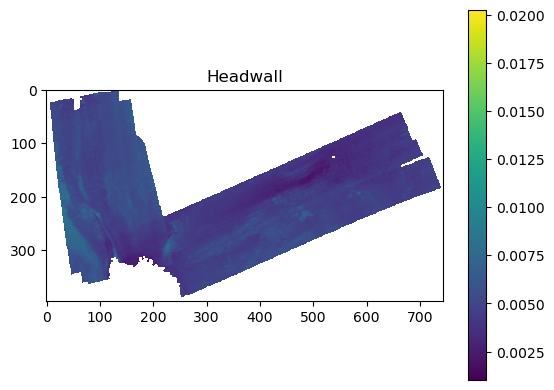

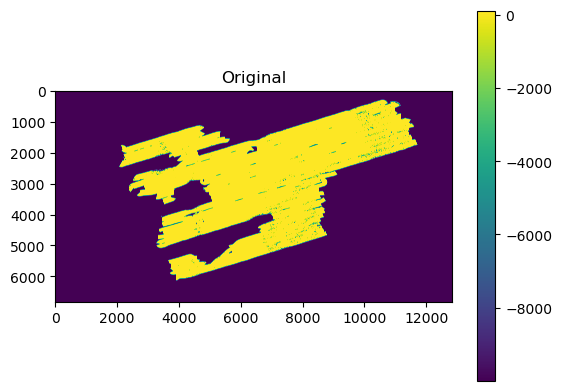

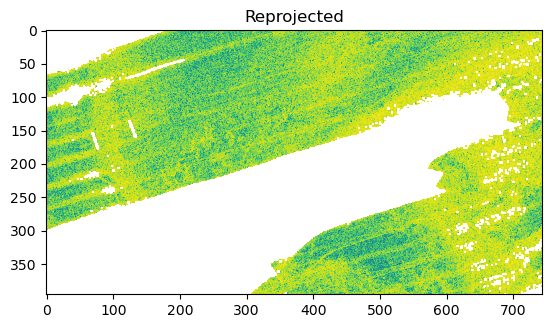

In [96]:

out_name = file[:-4]+'_reproj.tif'

# Load the hyperspectral data 
with rio.open(img_file) as src:
    arr = src.read()
    meta = src.meta
    
    arr[arr==meta['nodata']] = np.nan

    plt.imshow(arr[50,:,:])
    plt.colorbar()
    plt.title('Headwall')
    plt.show()
    
    # Load the bathymetry data 
    with rio.open(file) as src1:
        arr1 = src1.read(1)
        arr1[arr1==src1.nodata] = src.nodata
        
        plt.imshow(arr1[:,:])
        plt.colorbar()
        plt.title('Original')
        plt.show()
        
        meta1 = src1.meta
        
        # Create a new raster file as the destination dataset
        dst_meta = meta.copy()
        
        dst_meta.update({
            "count": 1,
            "nodata": -9999.0
        })

        with rio.open(out_name, 'w', **dst_meta) as dst:
            # Reproject the bathymetry raster to match the CRS of the hyperspectral data
            reproject(
                arr1,
                destination=rio.band(dst, 1),
                src_crs=meta1['crs'],
                dst_crs=dst_meta['crs'],
                src_transform=meta1['transform'],
                dst_transform=dst_meta['transform'],
                resampling=Resampling.nearest)

# check reprojected bathymetry

with rio.open(out_name) as reproj:
    reproj_arr = reproj.read(1)
    reproj_arr[reproj_arr==reproj.nodata] = np.nan
    

    fig,ax = plt.subplots()
    show(reproj_arr, ax=ax)
    plt.title('Reprojected')
    plt.show()  
                